In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import os
import re
import seaborn as sns
import joypy

%matplotlib inline
set_matplotlib_formats('retina')

<br>

# Exploratory Analysis

## Tables/Data

In [2]:
list_identification = ['Club', 'Name', 'Position', 'Overall', 'Value', 'Wage']
list_positions      = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 
                       'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 
                       'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
list_positions_gk   = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
list_features       = list_identification + list_positions
list_target         = 'ST,LF,CF,RF,LM,CM,RM,CDM,LB,CB,RB,GK'.split(',')
list_skills         = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
                       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
                       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
                       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
                       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
                       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
                       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [3]:
portuguese_league = ['SL Benfica', 'FC Porto', 'Sporting CP', 'SC Braga',
                     'Moreirense FC', 'Vitória Guimarães', 'Vitória de Setúbal', 'Os Belenenses',
                     'Santa Clara', 'Rio Ave FC', 'Portimonense SC', 'Clube Sport Marítimo',
                     'Boavista FC', 'CD Aves', 'CD Tondela', 'CD Nacional',
                     'GD Chaves', 'CD Feirense']

In [4]:
df_data = pd.read_csv('./input/data.csv', index_col=0)
df_dataset = pd.read_csv('./output/dataset.csv', index_col=0)
df_optimal = pd.read_csv('./output/optimal.csv', index_col=0)
df_score   = pd.read_csv('./output/scores.csv', index_col=0)

In [5]:
plt.rc('font', family='serif')

<br>

# Joyplots

<br>

**Distribution of Position Scores (except GK)**

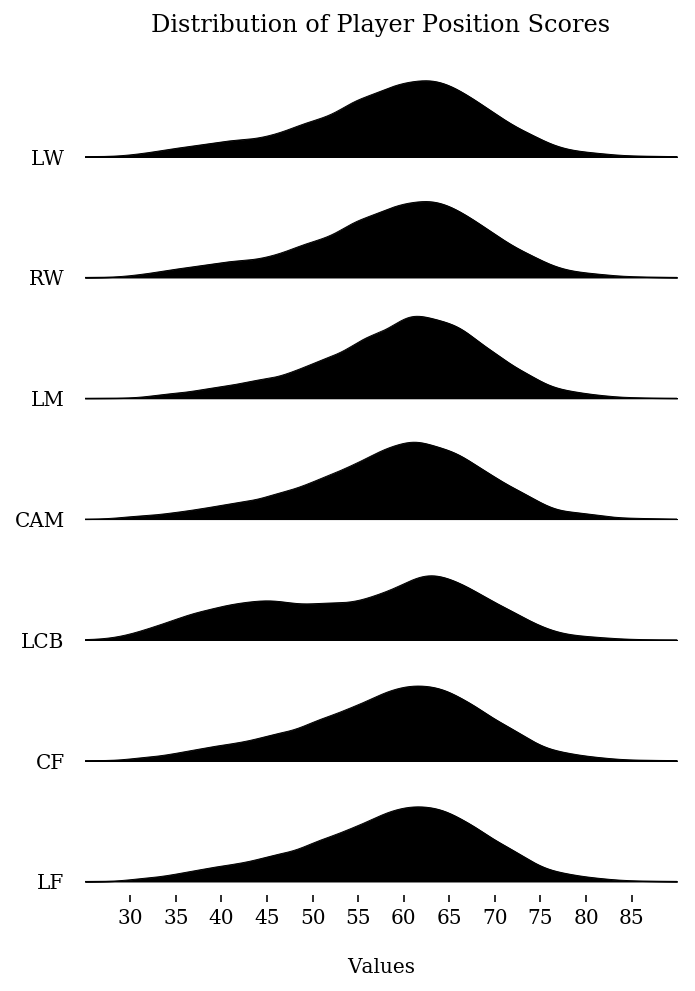

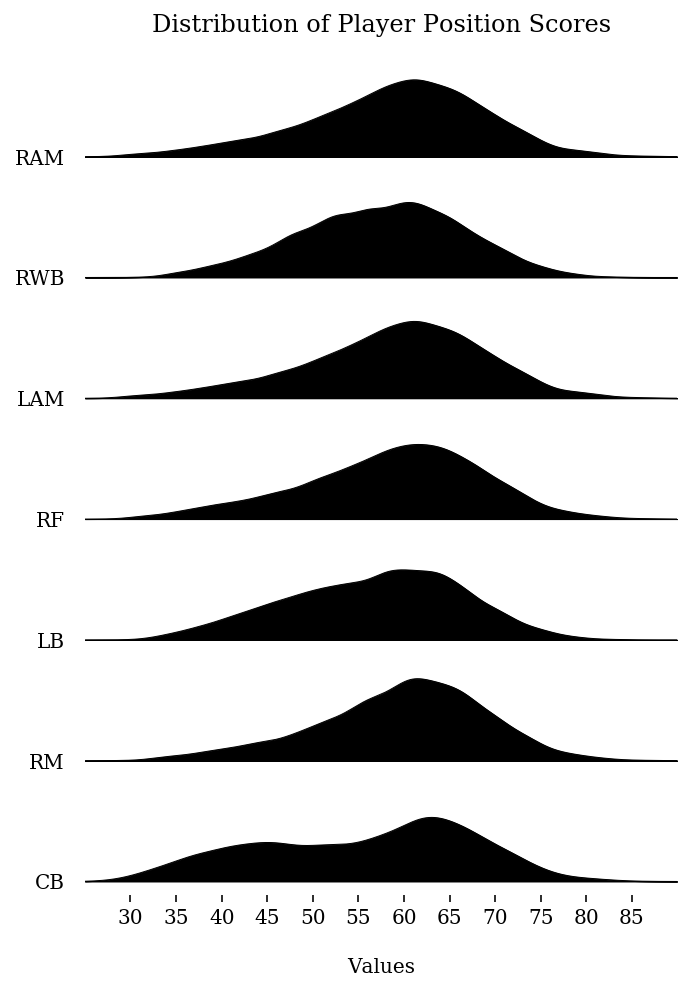

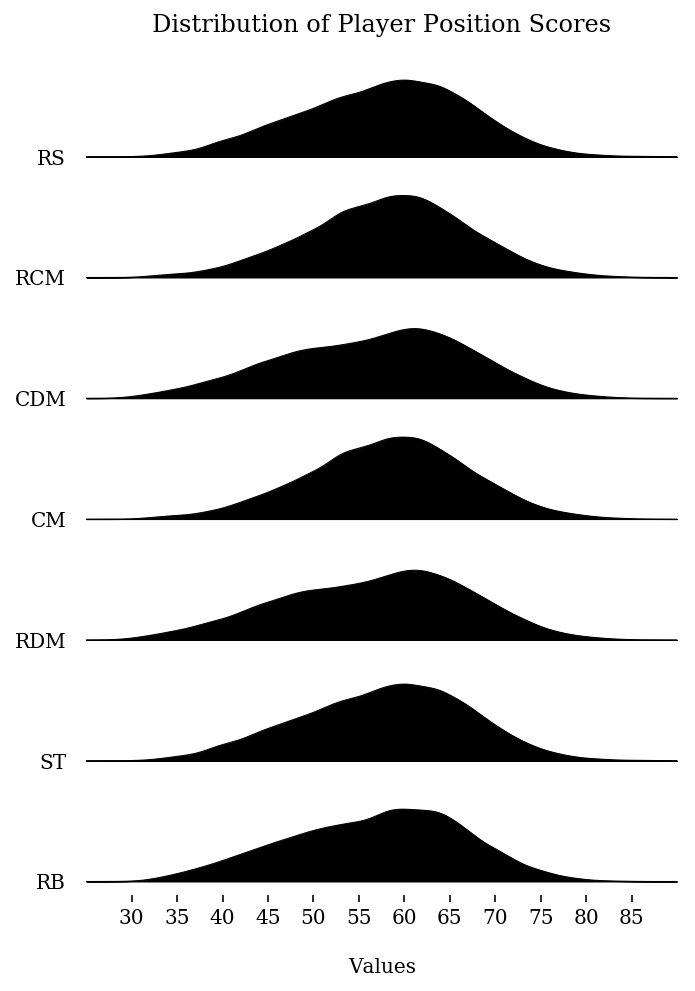

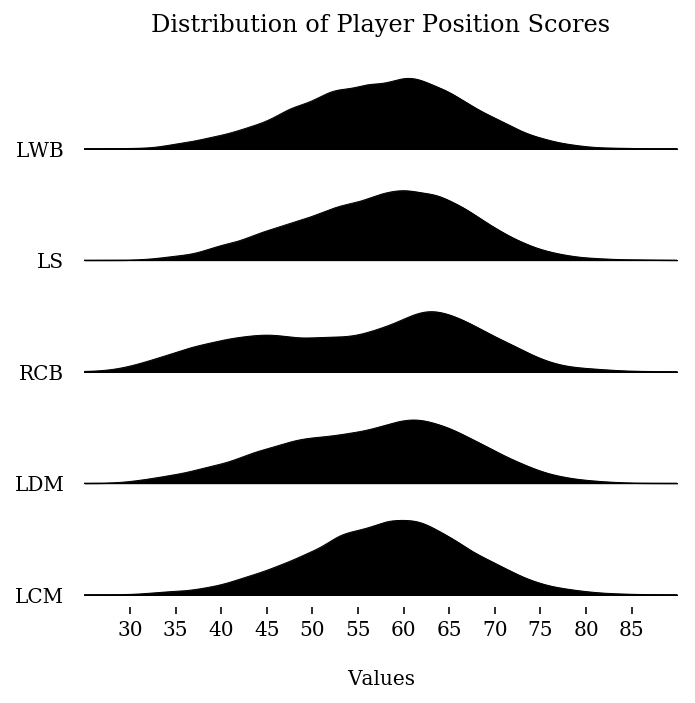

In [6]:
for i in range(4):
    if i<3:
        joypy.joyplot(df_dataset[(df_dataset.Position != 'GK')].loc[:,list(set(list_positions)-set('GK'))[i*7:(i+1)*7]],
                  grid=False, figsize=(5,7), linecolor="k", color='k', linewidth=0.5, legend=False, x_range=[25,90],
                  title='Distribution of Player Position Scores\n')#, fade=False, overlap=1, ylim=False)#,
                  #hist=True, bins=30);
        plt.xlabel('\nValues')
        plt.xticks(np.arange(30, 90, step=5))
        plt.tight_layout()
        plt.savefig('./output/img/exploratoryJoyplot_Positions_'+str(i)+'_bin.png', dpi=200, bbox_inches='tight', transparent=True)
        plt.show()
    elif i==3:
        joypy.joyplot(df_dataset[(df_dataset.Position != 'GK')].loc[:,list(set(list_positions)-set('GK'))[i*7:(i+1)*7]],
                  grid=False, figsize=(5,5), linecolor="k", color='k', linewidth=0.5, legend=False, x_range=[25,90],
                  title='Distribution of Player Position Scores\n')#, fade=False, overlap=1, ylim=False)#,
                  #hist=True, bins=30);
        plt.xlabel('\nValues')
        plt.xticks(np.arange(30, 90, step=5))
        plt.tight_layout()
        plt.savefig('./output/img/exploratoryJoyplot_Positions_'+str(i)+'_bin.png', dpi=200, bbox_inches='tight', transparent=True)
        plt.show()


**Distribution of Skill Scores (except GK)**

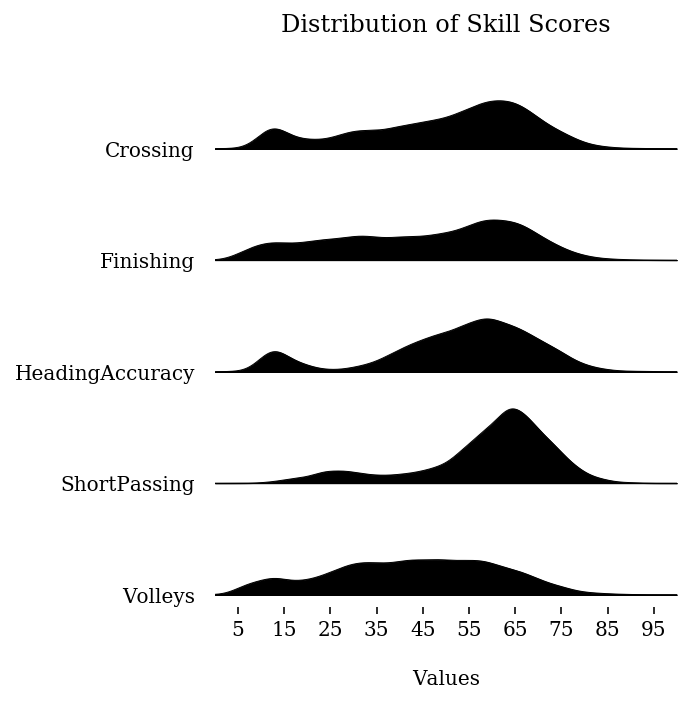

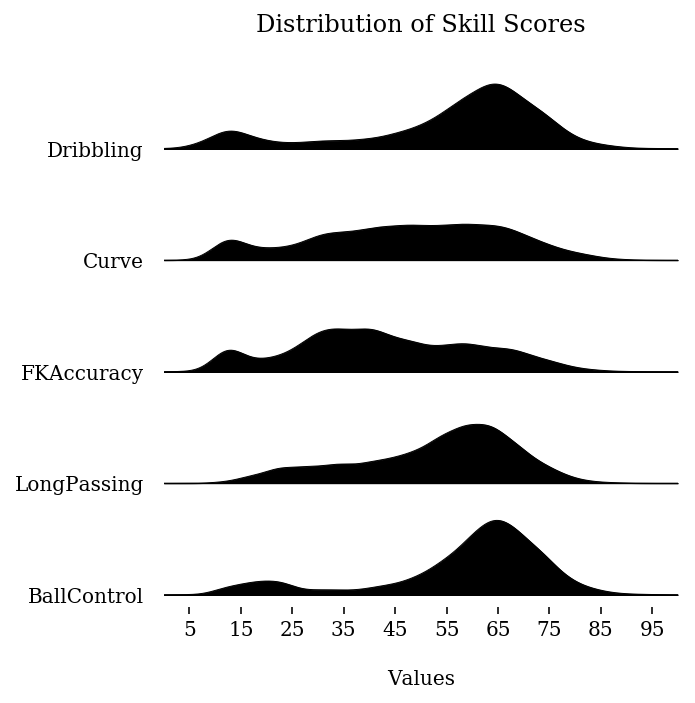

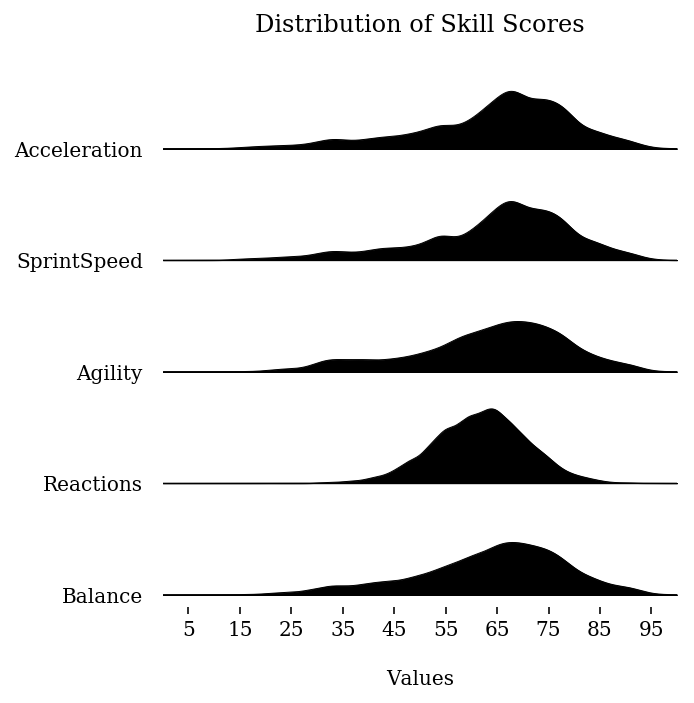

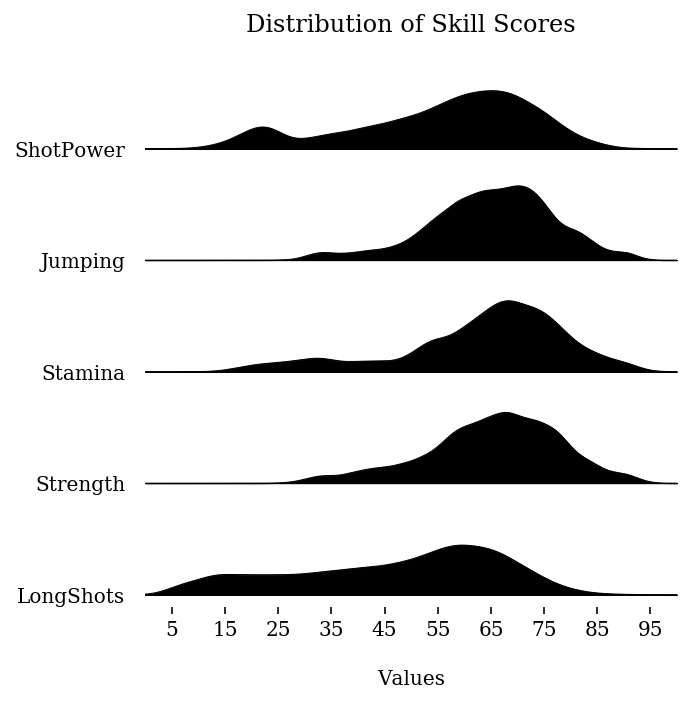

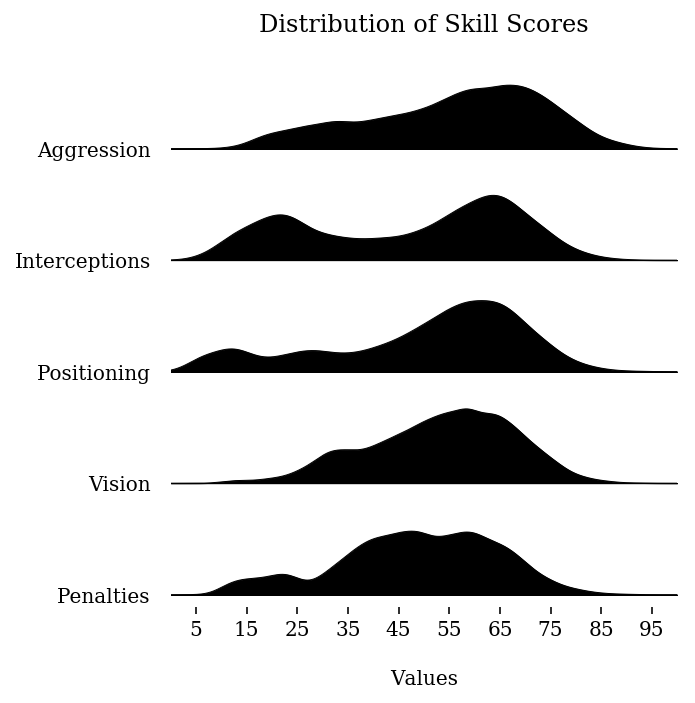

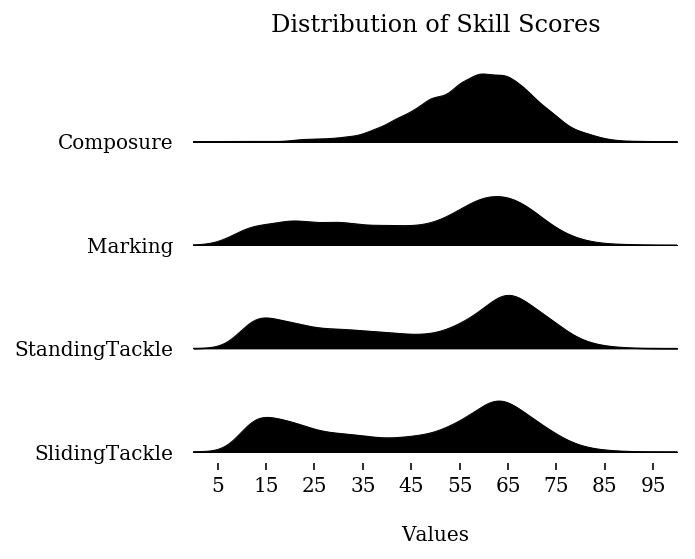

In [7]:
temp_skills = list_skills[:-5]

for i in range(6):
    if i<5:
        joypy.joyplot(df_dataset.loc[:,temp_skills[i*5:(i+1)*5]],
                      grid=False, figsize=(5,5), linecolor="k", color='k', linewidth=0.5, legend=False, x_range=[0,100],
                      title='Distribution of Skill Scores\n')#, fade=False, overlap=0.75, ylim=False,
                      #hist=True, bins=30);
        plt.xlabel('\nValues')
        plt.xticks(np.arange(5, 100, step=10))
        plt.tight_layout()
        plt.savefig('./output/img/exploratoryJoyplot_Skills_'+str(i)+'_bin.png', dpi=200, bbox_inches='tight', transparent=True)
        plt.show()
    elif i==5:
        joypy.joyplot(df_dataset.loc[:,temp_skills[i*5:(i+1)*5]],
                  grid=False, figsize=(5,4), linecolor="k", color='k', linewidth=0.5, legend=False, x_range=[0,100],
                  title='Distribution of Skill Scores\n')#, fade=False, overlap=0.75, ylim=False,
                  #hist=True, bins=30);
        plt.xlabel('\nValues')
        plt.xticks(np.arange(5, 100, step=10))
        plt.tight_layout()
        plt.savefig('./output/img/exploratoryJoyplot_Skills_'+str(i)+'_bin.png', dpi=200, bbox_inches='tight', transparent=True)
        plt.show()


# Bar Charts

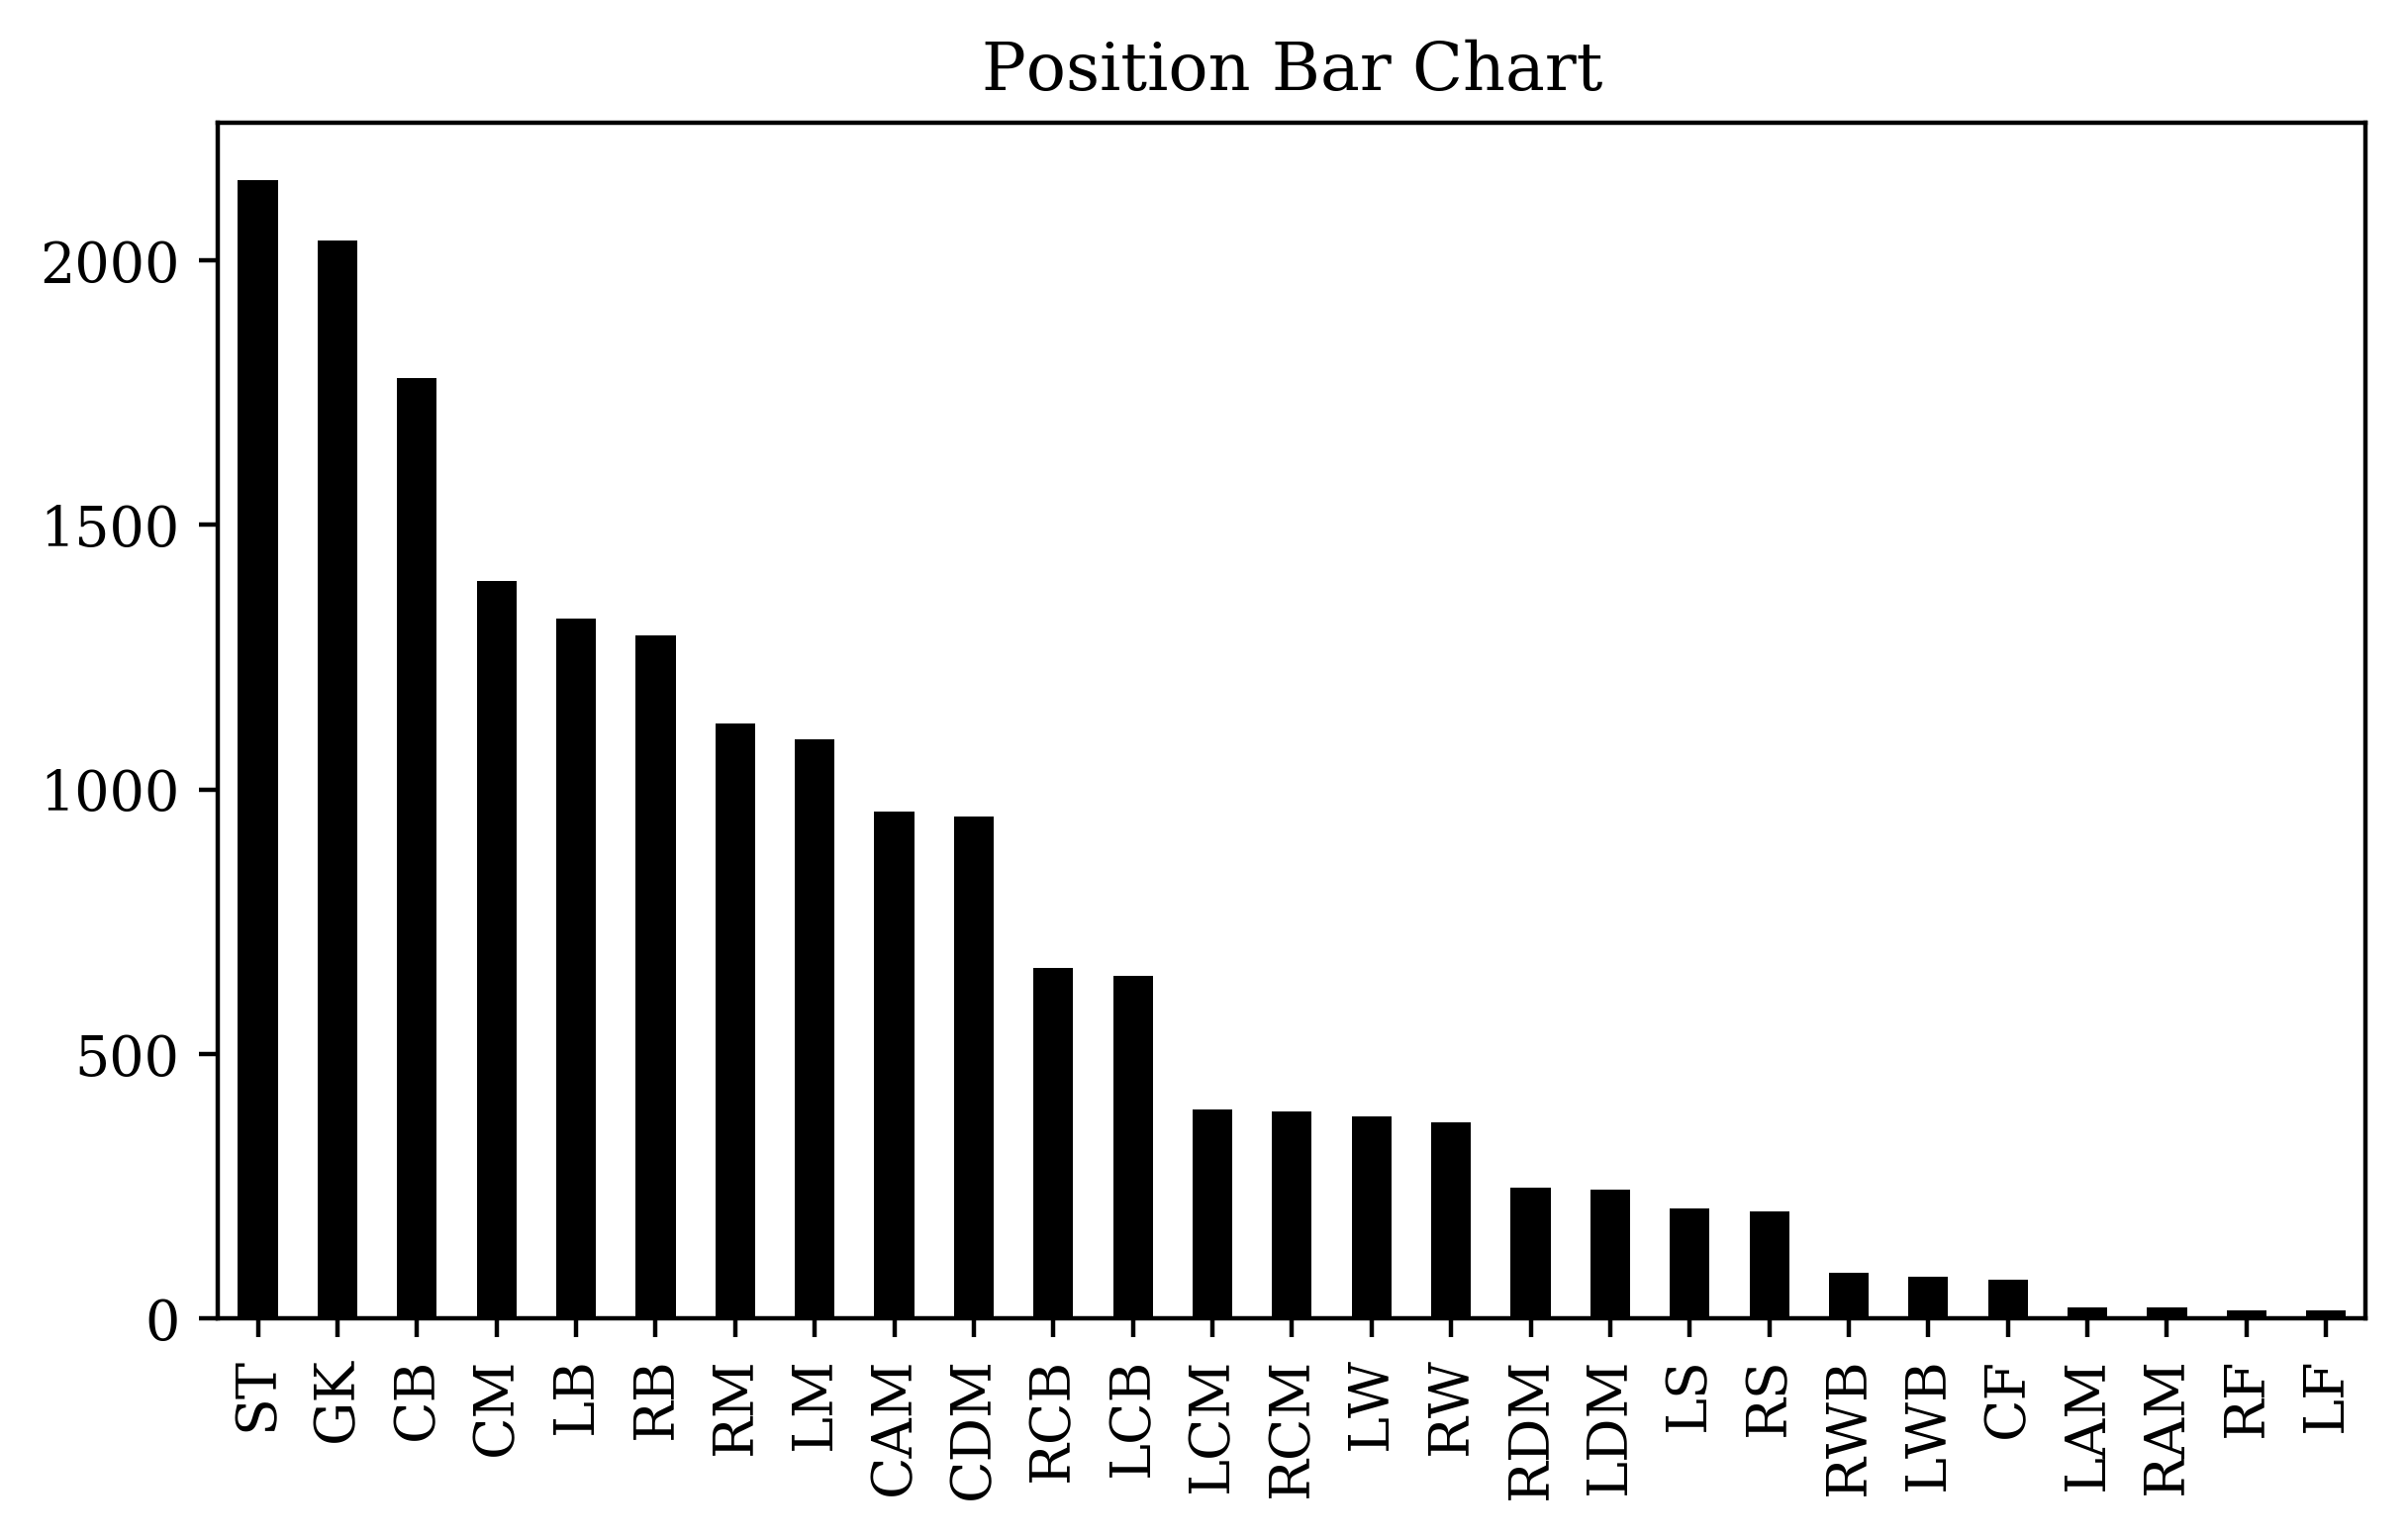

In [8]:
df_plot = df_dataset.loc[:,['Position']]
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 4), dpi=200)#; axes = axes.flatten()
for i, var in enumerate(df_plot.columns):
    pd.value_counts(df_plot.loc[:,var]).plot.bar(ax=axes, color='k')
    axes.set_title(f'{var} Bar Chart')
#plt.tight_layout()
#if True:
#    for i in range(1,2):
#        axes[i].set_axis_off()
plt.savefig('./output/img/exploratoryBarCharts01.png', bbox_inches='tight', transparent=True)
plt.show()

<br>

# Histograms

In [9]:
if False:
    df_plot = df_dataset[(df_dataset.Position != 'GK')].loc[:,list(set(list_positions)-set('GK'))]#df_dataset.iloc[:,(df_dataset.columns.str.len()==2)|(df_dataset.columns.str.len()==3)]
    f, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 40.5)); axes = axes.flatten()
    for i, var in enumerate(df_plot.columns):
        df_plot.loc[:,var].plot.hist(ax=axes[i])
        axes[i].set_title(f'{var} Histogram')
        axes[i].set_xlabel('Values')
    plt.tight_layout()
    axes[27-1].set_axis_off()
    plt.savefig('./images/exploratoryHistograms01.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

In [10]:
if False:
    df_plot = df_dataset.loc[:,list_skills[:-5]]
    f, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 45)); axes = axes.flatten()
    for i, var in enumerate(df_plot.columns):    
        df_plot.loc[:,var].plot.hist(ax=axes[i])
        axes[i].set_title(f'Histogram of {var}')
        axes[i].set_xlabel('Values')
    plt.tight_layout()
    axes[30-1].set_axis_off()
    plt.savefig('./images/exploratoryHistograms02.png', dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

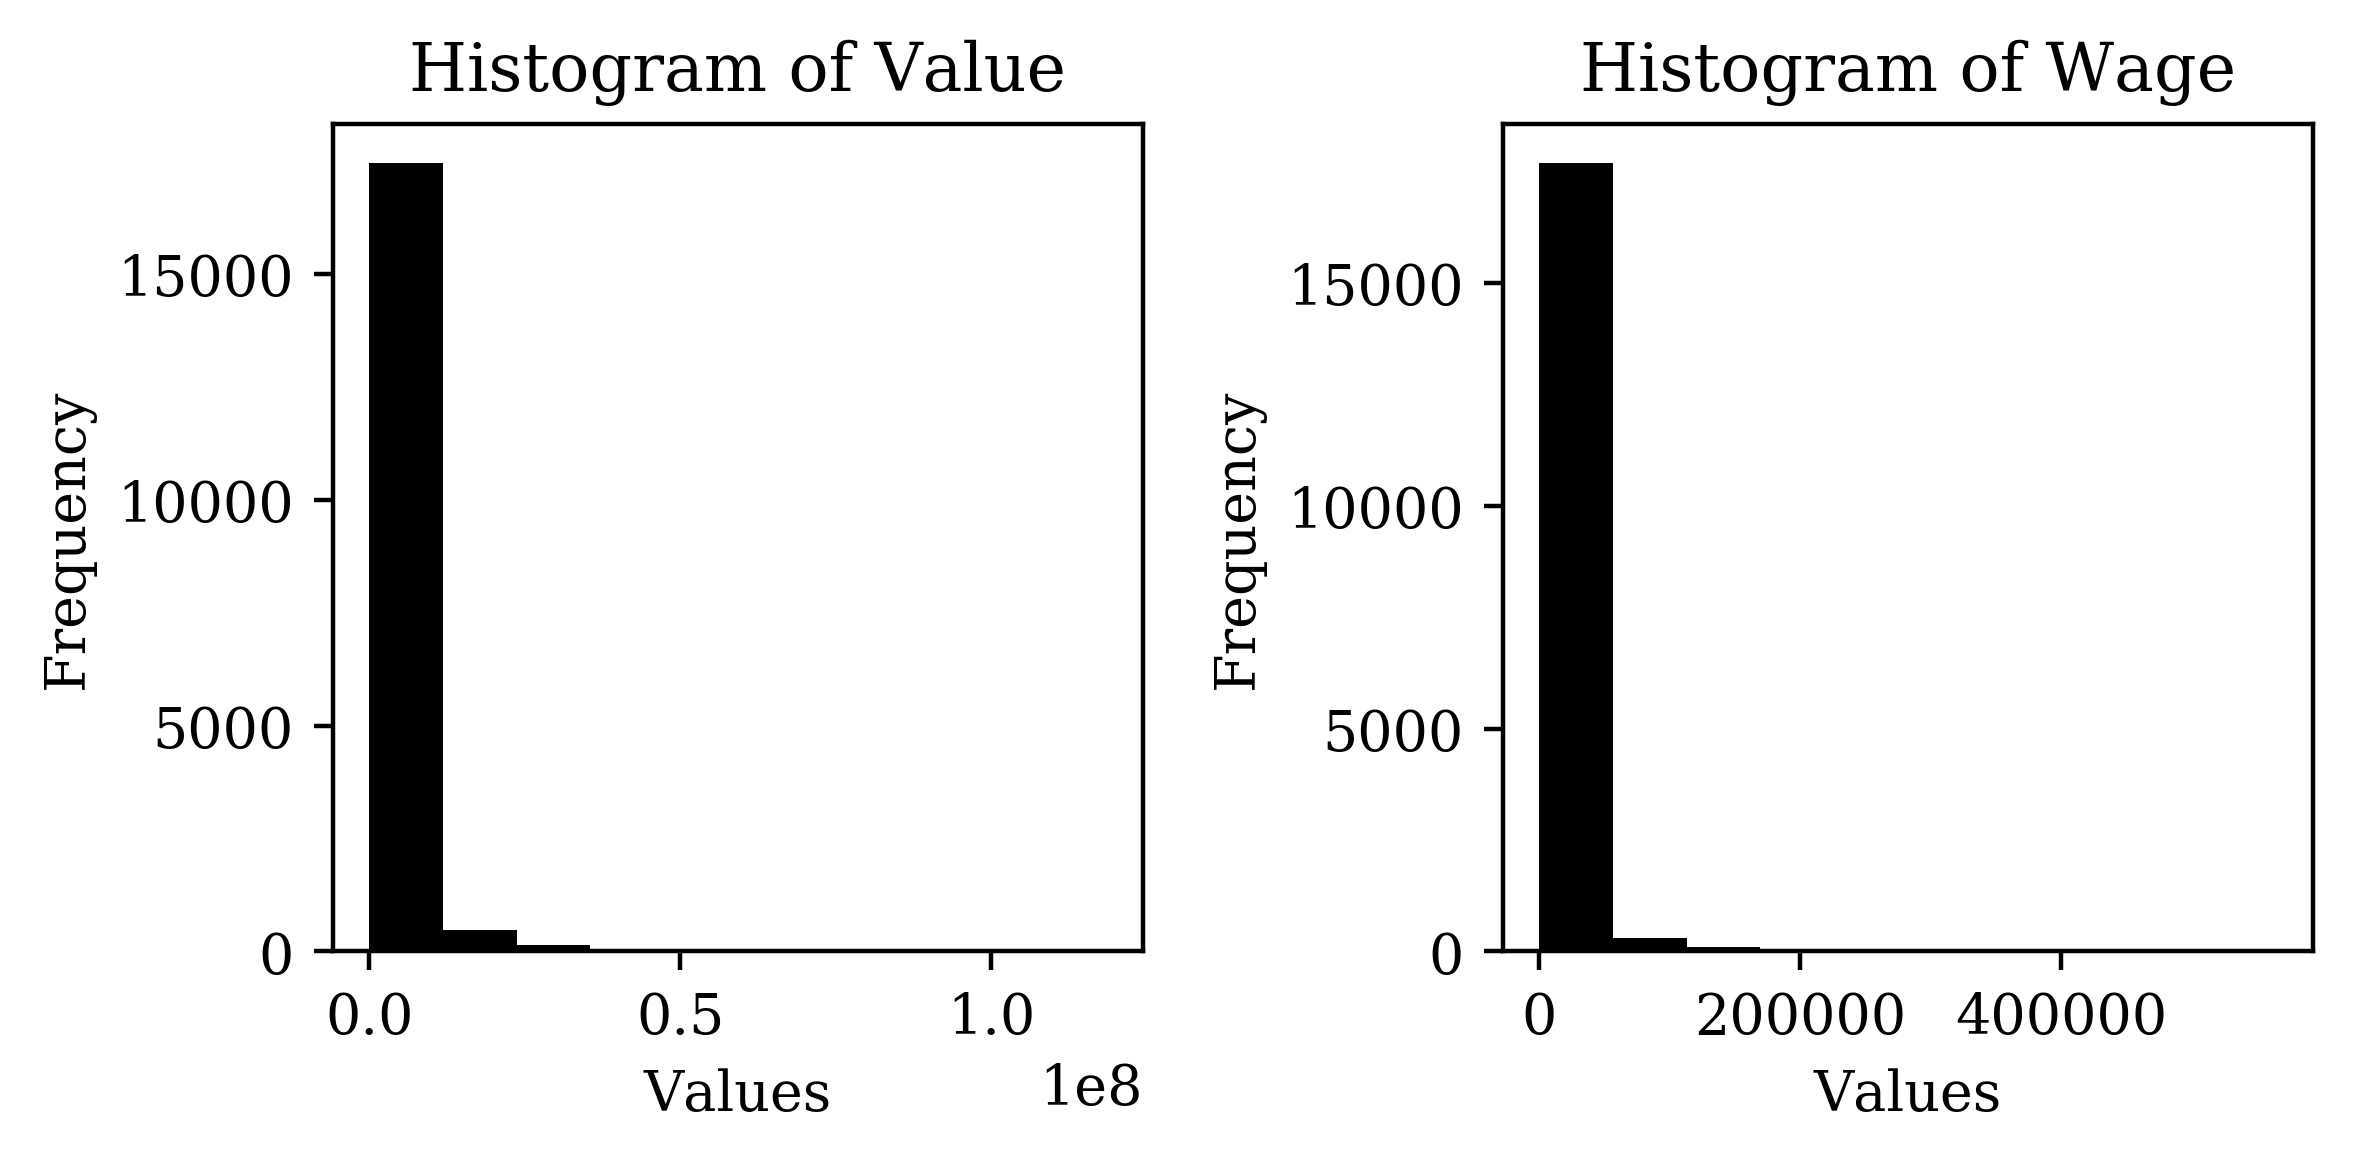

<Figure size 432x288 with 0 Axes>

In [11]:
df_plot = df_dataset.loc[:,['Value', 'Wage']]
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3), dpi=200); axes = axes.flatten()
for i, var in enumerate(df_plot.columns):    
    df_plot.loc[:,var].plot.hist(ax=axes[i], color='k')
    axes[i].set_title(f'Histogram of {var}')
    axes[i].set_xlabel('Values')
plt.tight_layout(); plt.show()
plt.savefig('./output/img/exploratoryHistograms03.png', bbox_inches='tight', transparent=True)
plt.show()

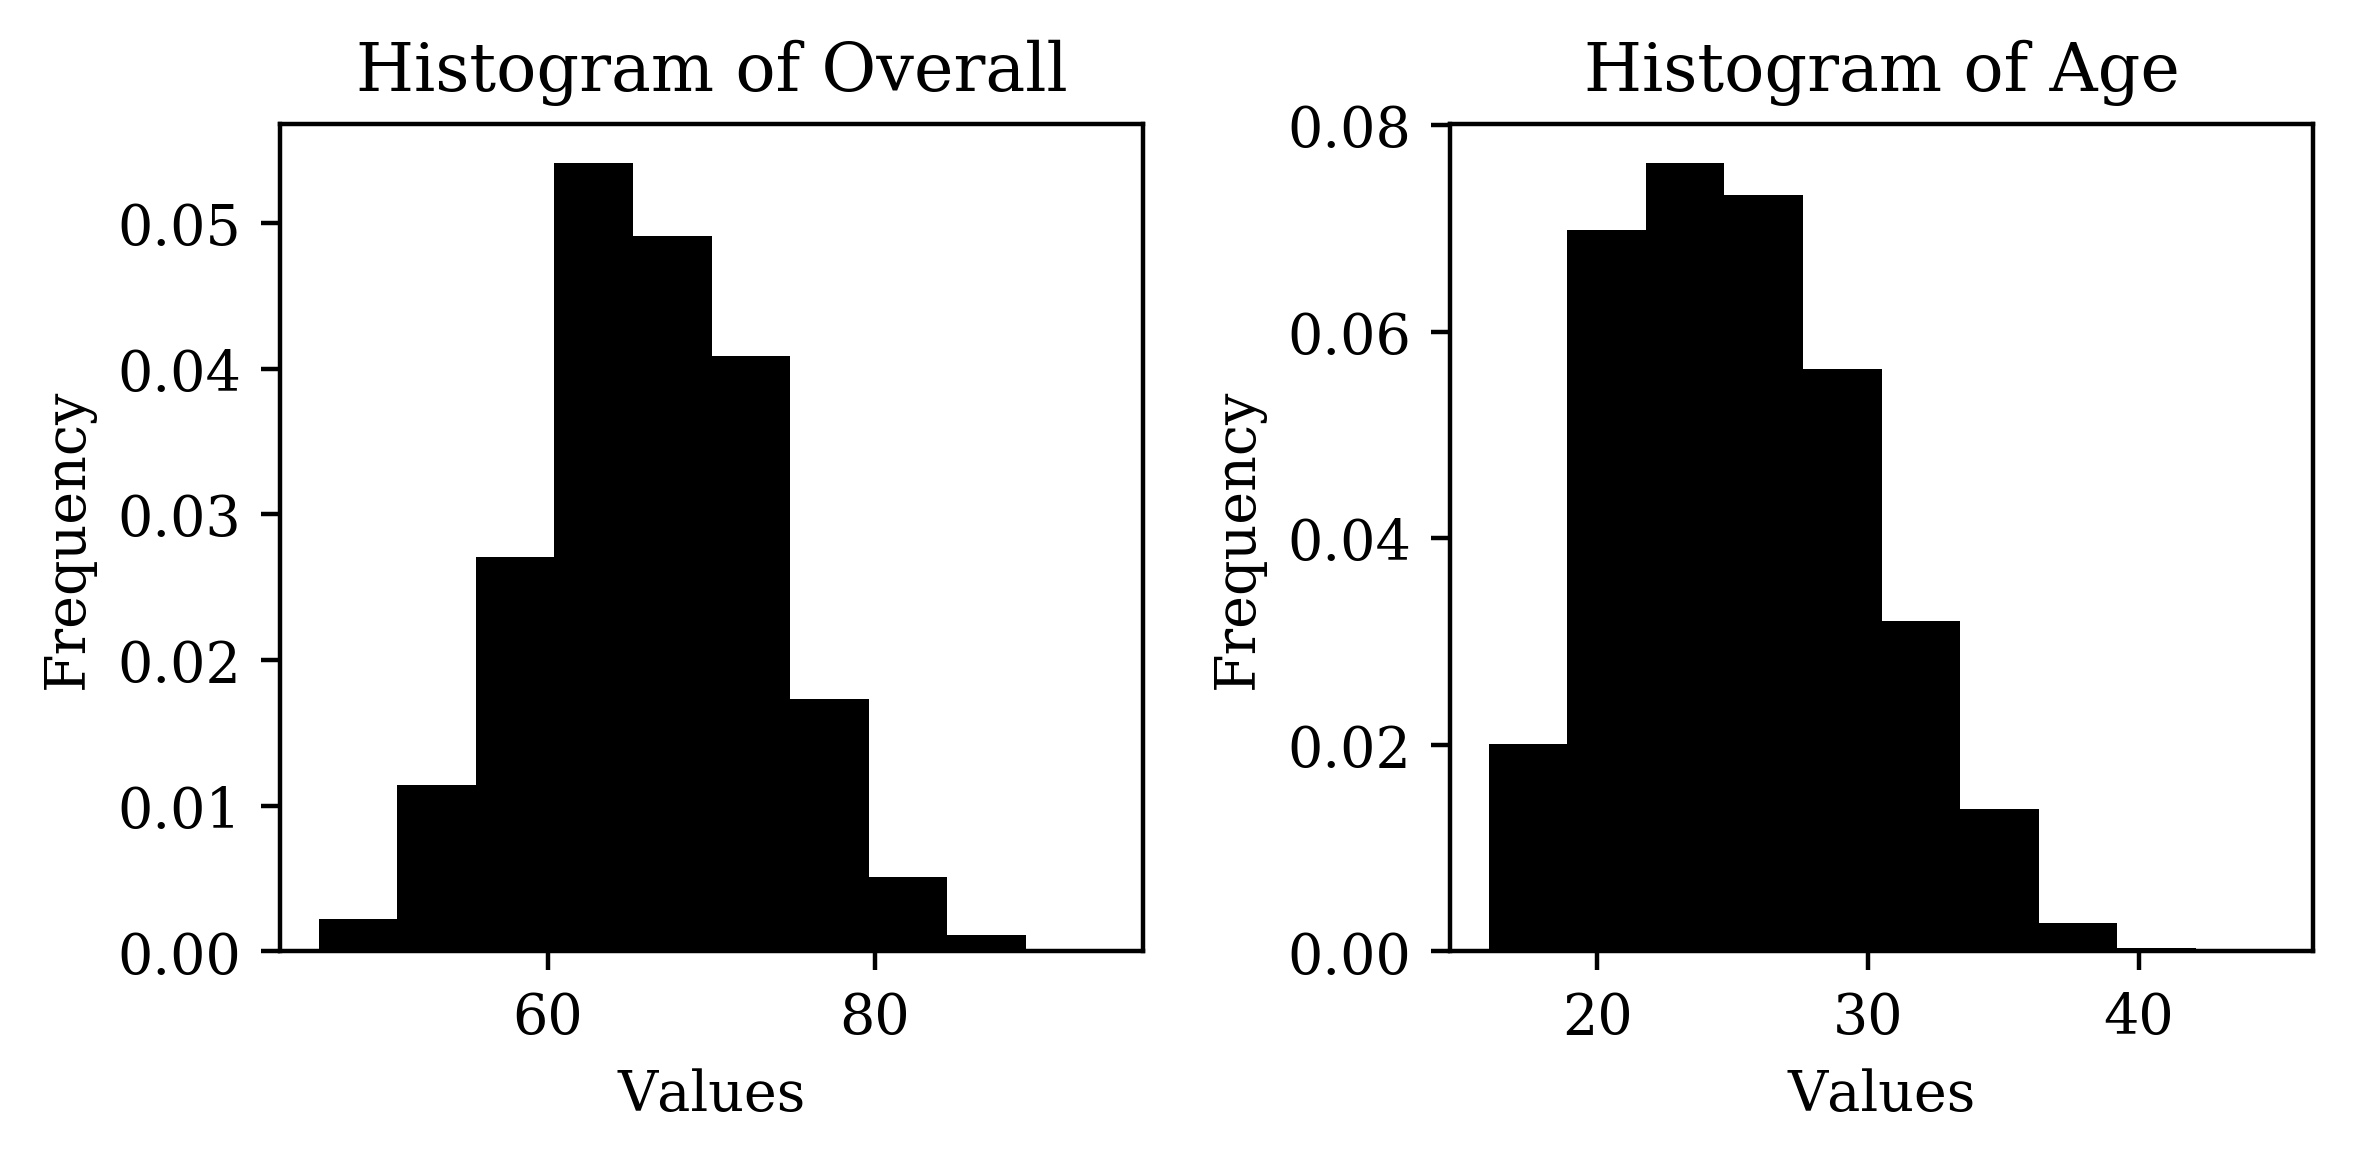

In [12]:
df_plot = df_data.loc[:,['Overall', 'Age']]
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3), dpi=200); axes = axes.flatten()
for i, col in enumerate(df_plot.columns): df_plot.iloc[:,i].plot.hist(ax=axes[i], density=True, color='k'); axes[i].set_xlabel('Values'); axes[i].set_title(f'Histogram of {col}')
plt.tight_layout();plt.savefig('./output/img/exploratoryOverallAge.png', bbox_inches='tight', transparent=True)
plt.show()

<br>

# Others

In [13]:
# Overall
df_dataset['Overall'].describe()

count    18159.000000
mean        66.249904
std          6.914613
min         46.000000
25%         62.000000
50%         66.000000
75%         71.000000
max         94.000000
Name: Overall, dtype: float64

In [14]:
# Club
df_dataset.loc[:,'Club'].value_counts().describe(include='all').to_frame()

Club
count  651.000000
mean    27.523810
std      2.603069
min     18.000000
25%     26.000000
50%     28.000000
75%     29.000000
max     33.000000

In [15]:
df_dataset.loc[:,['Value','Wage']].describe()

Value           Wage
count  1.815900e+04   18159.000000
mean   2.416131e+06    9752.574481
std    5.601319e+06   22024.397597
min    0.000000e+00       0.000000
25%    3.000000e+05    1000.000000
50%    6.750000e+05    3000.000000
75%    2.000000e+06    9000.000000
max    1.185000e+08  565000.000000

In [16]:
len(list_skills)

34

In [17]:
df_dataset.loc[:,list_skills].describe()

Crossing     Finishing  HeadingAccuracy  ShortPassing  \
count  18159.000000  18159.000000     18159.000000  18159.000000   
mean      49.734181     45.550911        52.298144     58.686712   
std       18.364524     19.525820        17.379909     14.699495   
min        5.000000      2.000000         4.000000      7.000000   
25%       38.000000     30.000000        44.000000     54.000000   
50%       54.000000     49.000000        56.000000     62.000000   
75%       64.000000     62.000000        64.000000     68.000000   
max       93.000000     95.000000        94.000000     93.000000   

            Volleys     Dribbling         Curve    FKAccuracy   LongPassing  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      42.909026     55.371001     47.170824     42.863153     52.711933   
std       17.694408     18.910371     18.395264     17.478763     15.327870   
min        4.000000      4.000000      6.000000      3.000000      9.000000   
25%       30.000000     49.000000     34.000000     31.000000     43.000000   
50%       44.000000     61.000000     48.000000     41.000000     56.000000   
75%       57.000000     68.000000     62.000000     57.000000     64.000000   
max       90.000000     97.000000     94.000000     94.000000     93.000000   

        BallControl  Acceleration   SprintSpeed       Agility     Reactions  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      58.369459     64.614076     64.726967     63.503607     61.836610   
std       16.686595     14.927780     14.649953     14.766049      9.010464   
min        5.000000     12.000000     12.000000     14.000000     21.000000   
25%       54.000000     57.000000     57.000000     55.000000     56.000000   
50%       63.000000     67.000000     67.000000     66.000000     62.000000   
75%       69.000000     75.000000     75.000000     74.000000     68.000000   
max       96.000000     97.000000     96.000000     96.000000     96.000000   

            Balance     ShotPower       Jumping       Stamina      Strength  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      63.966573     55.460047     65.089432     63.219946     65.311967   
std       14.136166     17.237958     11.820044     15.894741     12.557000   
min       16.000000      2.000000     15.000000     12.000000     17.000000   
25%       56.000000     45.000000     58.000000     56.000000     58.000000   
50%       66.000000     59.000000     66.000000     66.000000     67.000000   
75%       74.000000     68.000000     73.000000     74.000000     74.000000   
max       96.000000     95.000000     95.000000     96.000000     97.000000   

          LongShots    Aggression  Interceptions   Positioning        Vision  \
count  18159.000000  18159.000000   18159.000000  18159.000000  18159.000000   
mean      47.109973     55.868991      46.698276     49.958478     53.400903   
std       19.260524     17.367967      20.696909     19.529036     14.146881   
min        3.000000     11.000000       3.000000      2.000000     10.000000   
25%       33.000000     44.000000      26.000000     38.000000     44.000000   
50%       51.000000     59.000000      52.000000     55.000000     55.000000   
75%       62.000000     69.000000      64.000000     64.000000     64.000000   
max       94.000000     95.000000      92.000000     95.000000     94.000000   

          Penalties     Composure       Marking  StandingTackle  \
count  18159.000000  18159.000000  18159.000000    18159.000000   
mean      48.548598     58.648274     47.281623       47.697836   
std       15.704053     11.436133     19.904397       21.664004   
min        5.000000      3.000000      3.000000        2.000000   
25%       39.000000     51.000000     30.000000       27.000000   
50%       49.000000     60.000000     53.000000       55.000000   
75%       60.000000     67.000000     64.000000       66.000000   
max  

In [18]:
df_data['Age'].describe()

count    18207.000000
mean        25.122206
std          4.669943
min         16.000000
25%         21.000000
50%         25.000000
75%         28.000000
max         45.000000
Name: Age, dtype: float64

In [19]:
df_dataset['Position'].describe()

count     18159
unique       27
top          ST
freq       2152
Name: Position, dtype: object